## 🔶 What is AdaBoost?
AdaBoost = Adaptive Boosting.

It works by:
1. Training many weak models (Decision Trees)
2. Each new model fixes errors of the previous one
3. Final prediction = weighted average of all models


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##  Load Dataset
Upload any regression dataset or use built-in example.

In [2]:

df = pd.read_csv(r"C:\Users\Asus\Ethans\ml\adaboosting\housing.csv")
# Drop categorical column
df = df.drop("ocean_proximity", axis=1)
df.dropna(inplace=True)

# Rename target column exactly like fetch_california_housing
df = df.rename(columns={"median_house_value": "Target"})
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Target
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Exploratory Data Analysis

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Target
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Cleaning
Dataset has no missing values, but this is where handling would be done.

## Train-Test Split

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train AdaBoost Regressor

In [5]:
model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, n_estimators=100, random_state=42)

## Predictions

In [6]:
y_pred = model.predict(X_test)
y_pred[:10]

array([214559.92461399, 197635.29265515, 214559.92461399, 141098.25270898,
       197635.29265515, 121612.10684932, 293696.98923193, 287537.68789014,
       369458.51399663, 127248.03849001])

## Evaluation Metrics

In [7]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(67099.75891710355, 6656717977.487241, 0.5132263271957349)

##  Actual vs Predicted Plot

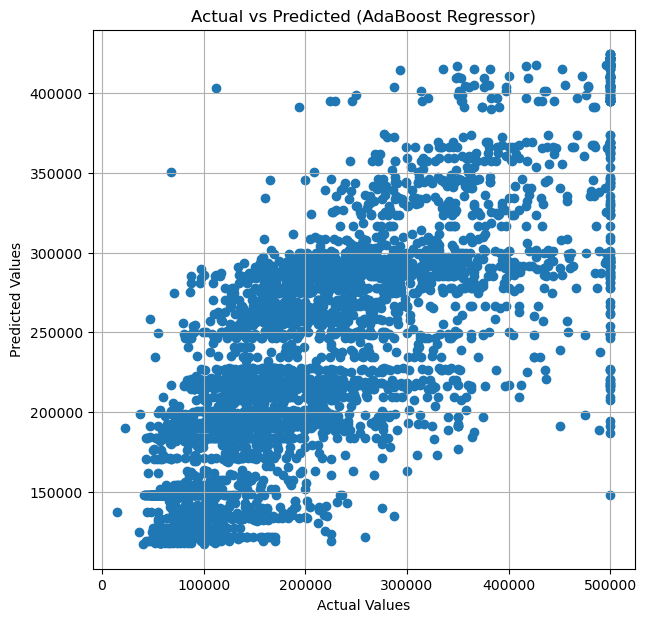

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (AdaBoost Regressor)')
plt.grid(True)
plt.show()